Name : Parham Rezaei
</br>
STDID : 400108547

# Problem 1

In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import time

# الف

In [17]:
x = np.array([1, 2, 2.5, 3, 4, 5, 6])
y = np.array([0, 5, 7, 6.5, 2, 0, -3])
evaluation_points = np.array([3.4, 4.5])

الگوریتم ها رو اول با وکتورایز نامپای اجرا کردم ولی کند شد

لاگرانز وکتورایز

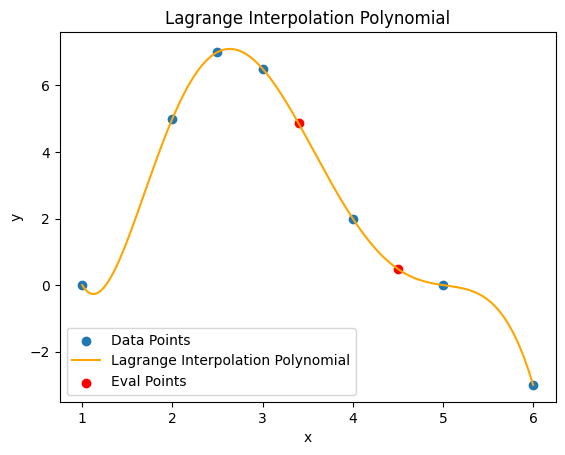

Lagrange interpolation at 3.4: 4.855244800000001
Lagrange interpolation at 4.5: 0.4843750000000018
Time : 0.026 seconds


In [19]:
def lagrange_interpolation(x, y, xi):
    result = 0.0
    for i in range(len(x)):
        term = y[i]
        for j in range(len(x)):
            if j != i:
                term *= (xi - x[j]) / (x[i] - x[j])
        result += term
    return result

def lagrange_polynomial(x, y):
    def poly(xi):
        return lagrange_interpolation(x, y, xi)
    return np.vectorize(poly)


lagrange_poly = lagrange_polynomial(x, y)

x_fine = np.linspace(min(x), max(x), 1000)
begin_time = time.time()
y_fine = lagrange_poly(x_fine)
end_time = time.time()

plt.scatter(x, y, label='Data Points')
plt.plot(x_fine, y_fine, label='Lagrange Interpolation Polynomial', color='orange')
plt.scatter(evaluation_points, lagrange_poly(evaluation_points), color='red', marker='o', label='Eval Points')

plt.title('Lagrange Interpolation Polynomial')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
for xi, res in zip(evaluation_points, lagrange_poly(evaluation_points)):
    print(f"Lagrange interpolation at {xi}: {res}")

print(f"Time : {round(end_time-begin_time,3)} seconds")

نیوتون وکتورایز

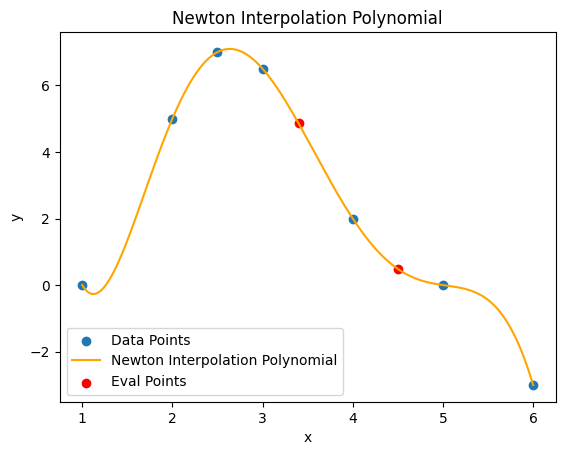

Lagrange interpolation at 3.4: 4.8552448
Lagrange interpolation at 4.5: 0.4843750000000102
Time : 0.026 seconds


In [20]:
def divided_difference(x, y):
    n = len(x)
    F = np.zeros((n, n))
    F[:, 0] = y

    for j in range(1, n):
        for i in range(n - j):
            F[i, j] = (F[i + 1, j - 1] - F[i, j - 1]) / (x[i + j] - x[i])

    return F[0, :]

def newton_interpolation(x, y, xi):
    coefficients = divided_difference(x, y)
    result = coefficients[0]
    for i in range(1, len(coefficients)):
        term = coefficients[i]
        for j in range(i):
            term *= (xi - x[j])
        result += term
    return result

def newton_polynomial(x, y):
    def poly(xi):
        return newton_interpolation(x, y, xi)
    return np.vectorize(poly)
begin_time = time.time()
newton_poly = newton_polynomial(x, y)

x_fine = np.linspace(min(x), max(x), 1000)
y_fine = newton_poly(x_fine)
end_time = time.time()
plt.scatter(x, y, label='Data Points')
plt.plot(x_fine, y_fine, label='Newton Interpolation Polynomial', color='orange')
plt.scatter(evaluation_points, newton_poly(evaluation_points), color='red', marker='o', label='Eval Points')

plt.title('Newton Interpolation Polynomial')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
for xi, res in zip(evaluation_points, newton_poly(evaluation_points)):
    print(f"Lagrange interpolation at {xi}: {res}")
print(f"Time : {round(end_time-begin_time,3)} seconds")

لاگرانژ

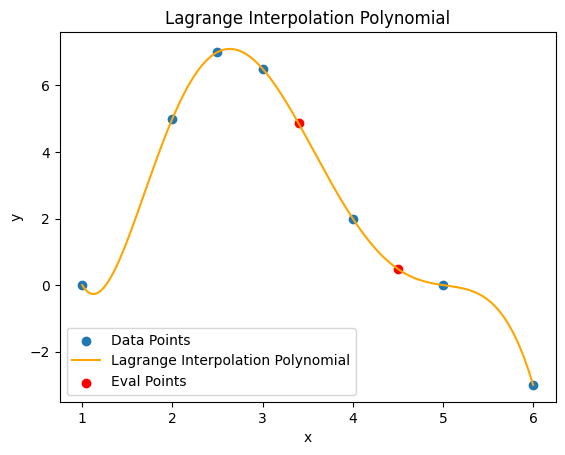

Lagrange interpolation at 3.4: 4.855244800000001
Lagrange interpolation at 4.5: 0.4843750000000018
Time : 0.0002880096435546875 seconds


In [21]:
def lagrange_interpolation(x, y, xi):
    result = 0.0
    for i in range(len(x)):
        term = y[i]
        for j in range(len(x)):
            if j != i:
                term *= (xi - x[j]) / (x[i] - x[j])
        result += term
    return result

x_fine = np.linspace(min(x), max(x), 1000)
begin_time = time.time()
y_fine = lagrange_interpolation(x, y, x_fine)
end_time = time.time()

plt.scatter(x, y, label='Data Points')
plt.plot(x_fine, y_fine, label='Lagrange Interpolation Polynomial', color='orange')
plt.scatter(evaluation_points, lagrange_interpolation(x,y,evaluation_points), color='red', marker='o', label='Eval Points')

plt.title('Lagrange Interpolation Polynomial')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
for xi, res in zip(evaluation_points, lagrange_interpolation(x,y,evaluation_points)):
    print(f"Lagrange interpolation at {xi}: {res}")

print(f"Time : {end_time-begin_time} seconds")

نیوتون

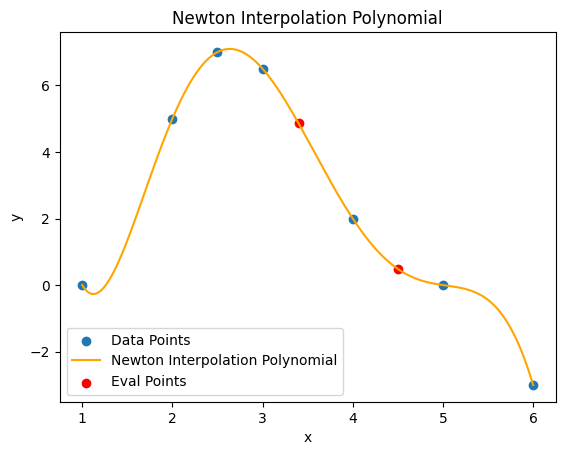

Lagrange interpolation at 3.4: 4.8552448
Lagrange interpolation at 4.5: 0.4843750000000102
Time : 0.00032520294189453125 seconds


In [22]:
def divided_difference(x, y):
    n = len(x)
    F = np.zeros((n, n))
    F[:, 0] = y

    for j in range(1, n):
        for i in range(n - j):
            F[i, j] = (F[i + 1, j - 1] - F[i, j - 1]) / (x[i + j] - x[i])

    return F[0, :]

def newton_interpolation(x, y, xi):
    coefficients = divided_difference(x, y)
    result = coefficients[0]
    for i in range(1, len(coefficients)):
        term = coefficients[i]
        for j in range(i):
            term *= (xi - x[j])
        result += term
    return result


begin_time = time.time()

x_fine = np.linspace(min(x), max(x), 1000)
y_fine = newton_interpolation(x,y,x_fine)
end_time = time.time()
plt.scatter(x, y, label='Data Points')
plt.plot(x_fine, y_fine, label='Newton Interpolation Polynomial', color='orange')
plt.scatter(evaluation_points, newton_interpolation(x, y, evaluation_points), color='red', marker='o', label='Eval Points')

plt.title('Newton Interpolation Polynomial')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
for xi, res in zip(evaluation_points, newton_interpolation(x, y, evaluation_points)):
    print(f"Lagrange interpolation at {xi}: {res}")
print(f"Time : {end_time-begin_time} seconds")

lagrange seems to calculate upto more digits and be more specific.
</br>
Evaluating the time, we observe the lagrange took 0.0005 while newton method took 0.0006 which is more. So lagrange proves to be faster

I used the vectorize method too above, which resulted in worse time in the calculation. Something to notice is that vectorizing really comes handy when dealaing with massive that which we are not in this problem.

# ب

برای پارالل کردن هر کدوم چندتا کار کردم.
</br>
برای لاگرانژ یه کرنل دارم که میام توش هر جمله رو به طور موازی حساب میکنم چون میشه موازی شن. بعدش یه جمع سری داره که برای
</br>
پرلل کردن این روش جمع حالت باینری طور که توی ویدیوهای آموزشی کودا درس بود رو پیاده سازی کردم.


برای پرلل کردن نیوتون هم یه کرنل دارم که اف ها رو حساب میکنم به طور موازی نحوه انجامش اینطوری که
</br>
میام هر لایه جدول محاسبش رو انجام میدم از چپ به راست بعدش سینک میکنم و بعد میرم لایه بعدی
</br>
بعدش کرنل ضرب اختلاف با نقاط درونیابی رو حساب میکنم و ذخیره بعدشم یه کرنل دارم که جمع نهایی رو مثل توی لاگرانژ با کرنل باینری طوره که توی ویدیوها بود انجام دادم.
</br>
مابقی بخشای بردن روی جی پی یو و ... هم مشابه تمرین قبلمه

In [23]:
!pip install git+https://github.com/andreinechaev/nvcc4jupyter.git
%load_ext nvcc_plugin

  Cloning https://github.com/andreinechaev/nvcc4jupyter.git to /tmp/pip-req-build-c143p2w4
  Running command git clone --filter=blob:none --quiet https://github.com/andreinechaev/nvcc4jupyter.git /tmp/pip-req-build-c143p2w4
  Resolved https://github.com/andreinechaev/nvcc4jupyter.git to commit 0a71d56e5dce3ff1f0dd2c47c29367629262f527
  Preparing metadata (setup.py) ... done
The nvcc_plugin extension is already loaded. To reload it, use:
  %reload_ext nvcc_plugin


# ب

لاگرانژ کودا

In [24]:
%%cu
#include <iostream>
#include <cmath>
#include <cuda_runtime.h>

const int N = 7;  // Number of data points


__global__ void lagrange_term_evaluation_cuda(const double* x, const double* y, double xi, double* terms) {
    int tid = threadIdx.x + blockIdx.x * blockDim.x;
    if (tid < N) {
        terms[tid] = 1.0;
        for (int j = 0; j < N; j++) {
            if (j != tid) {
                terms[tid] *= (xi - x[j]) / (x[tid] - x[j]);
            }
        }
        terms[tid] *= y[tid];
    }
}

__global__ void lagrange_interpolation_summation_cuda(const double* terms, double* result) {
    int tid = threadIdx.x + blockIdx.x * blockDim.x;
    result[tid] = terms[tid];
    for(int s = 1;s < N; s*=2){
        if((tid % (2*s)) == 0){
            result[tid] += result[tid + s];
        }
        __syncthreads();
    }
}

int main() {
    // Given data
    double x[N] = {1, 2, 2.5, 3, 4, 5, 6};
    double y[N] = {0, 5, 7, 6.5, 2, 0, -3};
    double evaluation_points[2] = {3.4, 4.5};

    double* x_gpu, *y_gpu, *terms_gpu, *result_gpu;
    cudaMalloc((void**)&x_gpu, N * sizeof(double));
    cudaMalloc((void**)&y_gpu, N * sizeof(double));
    cudaMalloc((void**)&terms_gpu, N * sizeof(double));
    cudaMalloc((void**)&result_gpu, N * sizeof(double));

    cudaMemcpy(x_gpu, x, N * sizeof(double), cudaMemcpyHostToDevice);
    cudaMemcpy(y_gpu, y, N * sizeof(double), cudaMemcpyHostToDevice);


    int threads_per_block = 128;
    int blocks_per_grid = (N + threads_per_block - 1) / threads_per_block;

    cudaEvent_t start, stop;
    cudaEventCreate(&start);
    cudaEventCreate(&stop);

    for (int i = 0; i < 2; ++i) {
        cudaEventRecord(start);

        lagrange_term_evaluation_cuda<<<blocks_per_grid, threads_per_block>>>(x_gpu, y_gpu, evaluation_points[i], terms_gpu);
        lagrange_interpolation_summation_cuda<<<blocks_per_grid, threads_per_block>>>(terms_gpu, result_gpu);

        cudaEventRecord(stop);
        cudaEventSynchronize(stop);
        float milliseconds = 0;
        cudaEventElapsedTime(&milliseconds, start, stop);
        std::cout << "Lagrange Interpolation on CUDA Time at " << evaluation_points[i] << ": " << milliseconds / 1000.0 << " seconds" << std::endl;

        double result[N];
        cudaMemcpy(result, result_gpu, N * sizeof(double), cudaMemcpyDeviceToHost);

        double interpolation_result = result[0];
        std::cout << "Lagrange Interpolation Result at " << evaluation_points[i] << ": " << interpolation_result << std::endl;
    }
    cudaFree(x_gpu);
    cudaFree(y_gpu);
    cudaFree(terms_gpu);
    cudaFree(result_gpu);
    cudaEventDestroy(start);
    cudaEventDestroy(stop);
    return 0;
}


Lagrange Interpolation on CUDA Time at 3.4: 0.000327968 seconds
Lagrange Interpolation Result at 3.4: 4.85524
Lagrange Interpolation on CUDA Time at 4.5: 2.512e-05 seconds
Lagrange Interpolation Result at 4.5: 0.484375



نیوتون کودا

In [25]:
%%cu
#include <iostream>
#include <cuda_runtime.h>

const int N = 7;

__global__ void newton_differences_cuda_2d(const double* x, const double* y, double* differences) {
    int tid = threadIdx.x;
    int level = 1;
    __shared__ double temp_differences[N + 1];
    __shared__ double diff[N + 1];
    temp_differences[tid] = y[tid];
    differences[tid] = y[tid];
    __syncthreads();

    for (; level < N; ++level) {
        if (tid < N - level) {
            diff[tid] = (temp_differences[tid + 1] - temp_differences[tid]) / (x[tid + level] - x[tid]);
        }
        __syncthreads();
        if (tid < N - level) {
            temp_differences[tid] = diff[tid];
        }
        __syncthreads();
        if (tid == 0) {
            differences[level] = diff[0];
        }
        __syncthreads();
    }
}

__global__ void newton_interpolation_cuda_terms(const double* x, const double* differences, const double* xi, double* terms) {
    int tid = threadIdx.x;
    terms[tid] = differences[tid];
    for (int j = 0; j < tid; ++j) {
        terms[tid] *= (*xi - x[j]);
    }
}

__global__ void newton_interpolation_cuda_sum(const double* terms, double* result) {
    int tid = threadIdx.x + blockIdx.x * blockDim.x;
    result[tid] = terms[tid];
    for (int s = 1; s < N; s *= 2) {
        if ((tid % (2 * s)) == 0) {
            result[tid] += result[tid + s];
        }
        __syncthreads();
    }
}

int main() {
    double x[N] = {1, 2, 2.5, 3, 4, 5, 6};
    double y[N] = {0, 5, 7, 6.5, 2, 0, -3};
    double evaluation_points[] = {3.4, 4.5};



    for (int i = 0; i < 2; ++i) {
        double total_time = 0.0;
        double evaluation_point = evaluation_points[i];
        double *x_gpu, *y_gpu, *differences_gpu, *xi_gpu, *terms_gpu, *result_gpu;
        cudaMalloc((void **) &x_gpu, N * sizeof(double));
        cudaMalloc((void **) &y_gpu, N * sizeof(double));
        cudaMalloc((void **) &differences_gpu, N * sizeof(double));
        cudaMalloc((void **) &xi_gpu, sizeof(double));
        cudaMalloc((void **) &terms_gpu, N * sizeof(double));
        cudaMalloc((void **) &result_gpu, N * sizeof(double));

        cudaMemcpy(x_gpu, x, N * sizeof(double), cudaMemcpyHostToDevice);
        cudaMemcpy(y_gpu, y, N * sizeof(double), cudaMemcpyHostToDevice);
        cudaMemcpy(xi_gpu, &evaluation_point, sizeof(double), cudaMemcpyHostToDevice);


        int threads_per_block = 32;
        int blocks_per_grid = 1;

        cudaEvent_t start, stop;
        cudaEventCreate(&start);
        cudaEventCreate(&stop);

        cudaEventRecord(start);
        newton_differences_cuda_2d<<<blocks_per_grid, threads_per_block>>>(x_gpu, y_gpu, differences_gpu);
        cudaEventRecord(stop);
        cudaEventSynchronize(stop);
        float milliseconds;
        cudaEventElapsedTime(&milliseconds, start, stop);
        std::cout << "Time taken for differences calculation: " << milliseconds / 1000.0 << " seconds" << std::endl;
        total_time += milliseconds;

        double differences_host[N];
        cudaMemcpy(differences_host, differences_gpu, N * sizeof(double), cudaMemcpyDeviceToHost);

        cudaEventRecord(start);
        newton_interpolation_cuda_terms<<<blocks_per_grid, threads_per_block>>>(x_gpu, differences_gpu, xi_gpu, terms_gpu);
        cudaEventRecord(stop);
        cudaEventSynchronize(stop);
        cudaEventElapsedTime(&milliseconds, start, stop);
        std::cout << "Time taken for terms calculation: " << milliseconds / 1000.0 << " seconds" << std::endl;
        total_time += milliseconds;

        cudaEventRecord(start);
        newton_interpolation_cuda_sum<<<1, N>>>(terms_gpu, result_gpu);
        cudaEventRecord(stop);
        cudaEventSynchronize(stop);
        cudaEventElapsedTime(&milliseconds, start, stop);
        std::cout << "Time taken for summation calculation: " << milliseconds / 1000.0 << " seconds" << std::endl;
        total_time += milliseconds;

        double result[N];
        cudaMemcpy(result, result_gpu, N * sizeof(double), cudaMemcpyDeviceToHost);
        std::cout << "Newton Interpolation Result at " << evaluation_point << ": " << result[0] << std::endl;
        std::cout << "Total time taken for the evaluation: " << total_time / 1000.0 << " seconds" << std::endl;
        std::cout << "==================================================" << std::endl;
        cudaFree(x_gpu);
        cudaFree(y_gpu);
        cudaFree(differences_gpu);
        cudaFree(xi_gpu);
        cudaFree(terms_gpu);
        cudaFree(result_gpu);
    }



    return 0;
}


Time taken for differences calculation: 0.000303296 seconds
Time taken for terms calculation: 3.8464e-05 seconds
Time taken for summation calculation: 2.896e-05 seconds
Newton Interpolation Result at 3.4: 4.85524
Total time taken for the evaluation: 0.00037072 seconds
Time taken for differences calculation: 1.9616e-05 seconds
Time taken for terms calculation: 2.2048e-05 seconds
Time taken for summation calculation: 1.0912e-05 seconds
Newton Interpolation Result at 4.5: 0.484375
Total time taken for the evaluation: 5.2576e-05 seconds



Evaluating the time taken, Using vectorizing the evaluation on 4.5
is way faster on both methods when cuda is used because it is run after 3.5.
</br>
What makes it take so long for newton method is the difference calculation part as the numbers show, with that we see that the result using newton method is 0.0003 which is less than the without parallelization ones.
</br>
The first one, the lagrange one, time is close to the newton one and still less than the without cuda one.
</br>
* The time when first evaluated is really close to the non cuda ones though.

The time taken really depends on how we make it parallel. doing naive parallelization performs worse as I tested a couple of ways and had to make each part more parallel to get better results which are shown above.

# Problem 2

data

In [2]:
x = np.array([0,1,2,3,4,5,6,7])
y = np.array([2.1,3.4,4,3.5,2.2,1.8,1.4,0.8])

# الف

In [3]:
def polyfit(x,y,degree,real_y=None):
    if real_y is None:
        real_y = y
    X = np.stack([x**i for i in range(degree+1)], axis=1)
    coefficients = np.linalg.lstsq(X, y, rcond=None)[0]
    def fitted_polynomial(x):
        t = 0
        for i in range(degree+1):
            t += coefficients[i] * x**i
        return t
    print('/\*' * 20)
    print('===' * 20)
    print("Fitting degree ", degree)
    print(f"Fitted coefficients: {coefficients}")
    predicted_y = fitted_polynomial(x)
    print(f"Predicted y values: {predicted_y}")
    error = np.sum((real_y - predicted_y)**2)/len(x)
    print(f"Error: {error}")
    x_fine = np.linspace(min(x), max(x), 100)
    y_fine = fitted_polynomial(x_fine)
    plt.plot(x_fine, y_fine, label='Cubic Spline (Degree 3)')
    plt.plot(x, real_y, 'o', label='Data points')
    plt.legend()
    plt.show()
    print('/\*' * 20)
    print('===' * 20)
    return error,predicted_y

/\*/\*/\*/\*/\*/\*/\*/\*/\*/\*/\*/\*/\*/\*/\*/\*/\*/\*/\*/\*
Fitting degree  1
Fitted coefficients: [ 3.525      -0.32142857]
Predicted y values: [3.525      3.20357143 2.88214286 2.56071429 2.23928571 1.91785714
 1.59642857 1.275     ]
Error: 0.5600892857142856


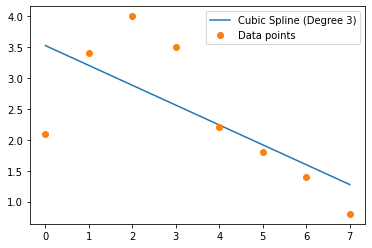

/\*/\*/\*/\*/\*/\*/\*/\*/\*/\*/\*/\*/\*/\*/\*/\*/\*/\*/\*/\*
/\*/\*/\*/\*/\*/\*/\*/\*/\*/\*/\*/\*/\*/\*/\*/\*/\*/\*/\*/\*
Fitting degree  2
Fitted coefficients: [ 2.65833333  0.5452381  -0.12380952]
Predicted y values: [2.65833333 3.0797619  3.25357143 3.1797619  2.85833333 2.28928571
 1.47261905 0.40833333]
Error: 0.2381845238095238


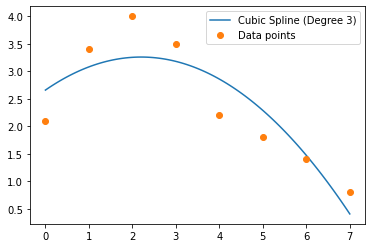

/\*/\*/\*/\*/\*/\*/\*/\*/\*/\*/\*/\*/\*/\*/\*/\*/\*/\*/\*/\*
Error difference (deg1 - deg2): 0.3219047619047618


In [4]:
errdeg1,_ = polyfit(x,y,1)
errdeg2,_ = polyfit(x,y,2)
print(f"Error difference (deg1 - deg2): {errdeg1 - errdeg2}")

so we see that the squared error on second degree is less -> it is better fitting the training data

# ب

کد با استفاده از سایپای

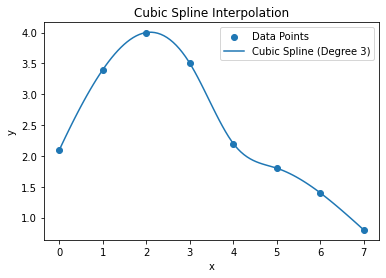

In [5]:

from scipy.interpolate import CubicSpline

cs = CubicSpline(x, y)


x_fine = np.linspace(min(x), max(x), 100)
y_fine = cs(x_fine)

plt.scatter(x, y, label='Data Points')
plt.plot(x_fine, y_fine, label='Cubic Spline (Degree 3)')
plt.title('Cubic Spline Interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


کد از اسکرچ اسپیلاین مکعبی طبیعی طبق الگوریتم کتاب

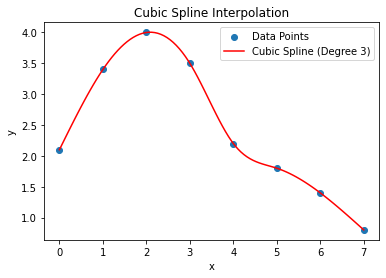

In [6]:
#own from scratch cubic splines [using the algorithm in the source book [numerical analysis page 149-150]]
def natural_cubic_spline(x,y):
    n = len(x)
    a = y.copy()
    b = np.zeros(n)
    d = np.zeros(n)
    h = np.zeros(n-1)
    alpha = np.zeros(n-1)
    c = np.zeros(n)
    for i in range(n-1):
        h[i] = x[i+1] - x[i]
    for i in range(1,n-1):
        alpha[i] = (3/h[i])*(a[i+1]-a[i]) - (3/h[i-1])*(a[i]-a[i-1])
    l = np.zeros(n)
    mu = np.zeros(n)
    z = np.zeros(n)
    l[0] = 1
    mu[0] = 0
    z[0] = 0
    for i in range(1,n-1):
        l[i] = 2*(x[i+1]-x[i-1]) - h[i-1]*mu[i-1]
        mu[i] = h[i]/l[i]
        z[i] = (alpha[i] - h[i-1]*z[i-1])/l[i]
    l[n-1] = 1
    z[n-1] = 0
    c[n-1] = 0
    for j in range(n-2,-1,-1):
        c[j] = z[j] - mu[j]*c[j+1]
        b[j] = (a[j+1]-a[j])/h[j] - h[j]*(c[j+1] + 2*c[j])/3
        d[j] = (c[j+1]-c[j])/(3*h[j])
    return a,b,c,d

#evaluating on each points -> bebinim che bazeiie badesh zarayebesho zarb konim
def eval_cubic_spline(x,a,b,c,d,x_eval):
    n = len(x)
    for i in range(n-1): # baze ii ke beyneshe
        if x_eval >= x[i] and x_eval <= x[i+1]:
            break
    t = x_eval - x[i]
    return a[i] + b[i]*t + c[i]*t**2 + d[i]*t**3

a,b,c,d = natural_cubic_spline(x,y)
x_fine = np.linspace(min(x), max(x), 100) # ye tedadi noghte gozashtam ke sheklesh maloom she
y_fine = np.zeros(len(x_fine))
for i in range(len(x_fine)):
    y_fine[i] = eval_cubic_spline(x,a,b,c,d,x_fine[i])
plt.scatter(x, y, label='Data Points')
plt.plot(x_fine, y_fine, label='Cubic Spline (Degree 3)', color="red")
plt.title('Cubic Spline Interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

حالا درجه های ۱ تا ۵ رو با استفاده از سایپای اسپیلایناشو بدست آوردم و کشیدم

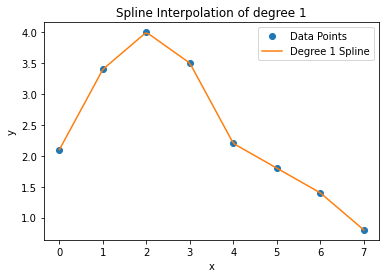

Error: 0.0


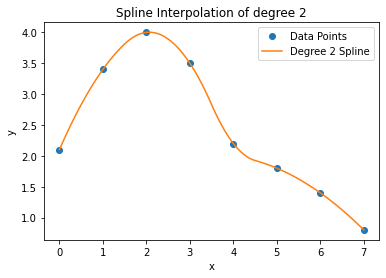

Error: 8.628166150854817e-32


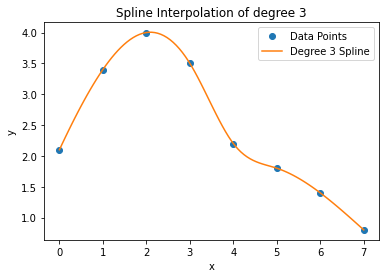

Error: 1.232595164407831e-31


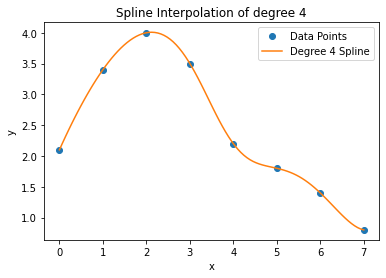

Error: 4.498972350088583e-31


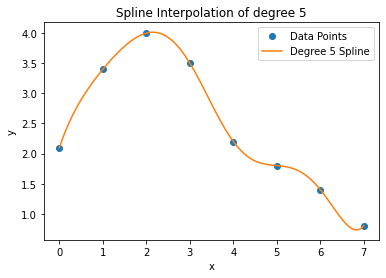

Error: 2.9582283945787943e-31


In [7]:
import numpy as np
from scipy.interpolate import splrep, splev

for degree in [1, 2, 3, 4, 5]:
    spline = splrep(x, y, k=degree)

    x_points = np.linspace(min(x), max(x), 100)
    y_points = splev(x_points, spline)

    plt.plot(x, y, 'o', label='Data Points')
    plt.plot(x_points, y_points, label=f'Degree {degree} Spline')
    plt.title(f'Spline Interpolation of degree {degree}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()
    # erroresh
    print(f"Error: {np.sum((y - splev(x, spline))**2)/len(x)}")


حال چندجمله ای های چبیشف را نیز برای فیت به دیتا نمایش دادم

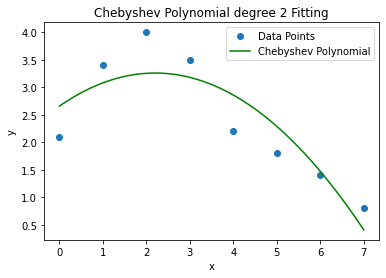

Error: 0.23818452380952387


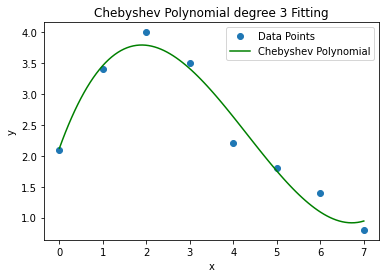

Error: 0.04498376623376621


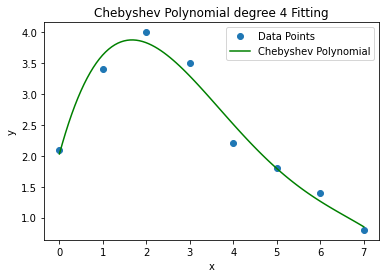

Error: 0.03133928571428572


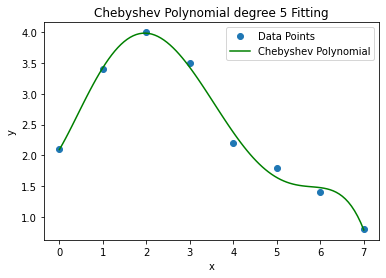

Error: 0.00844551282051281


In [8]:
from numpy.polynomial import Chebyshev


for degree in [2, 3, 4, 5]:
    cheb_poly = Chebyshev.fit(x, y, degree)
    x_points = np.linspace(min(x), max(x), 100)
    y_points = cheb_poly(x_fine)

    plt.plot(x, y, 'o', label='Data Points')
    plt.plot(x_points, y_points, label=f'Chebyshev Polynomial', color="green")
    plt.title(f'Chebyshev Polynomial degree {degree} Fitting')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()
    print(f"Error: {np.sum((y - cheb_poly(x))**2)/len(x)}")


We observe that on the training data itself, splines work the best as they fit the data perfectly, but in order to be able to generalize.

But if we consider how generalizable ones work, I mean least squares and chebyshev we observe that when
</br>
the degree goes up the error becomes less on the training data. but still on small degrees chebyshev achieved quite better performance something
</br>
around 0.04 compared to the 2nd degree lse of 0.23. Way better indeed. But yet it remains to evaluate on noisy data and in general data coming from out of training set.

ج

We add the noise to the data and try to fit each model then we observe the error between the real values and the predicted values when trained on noisy data

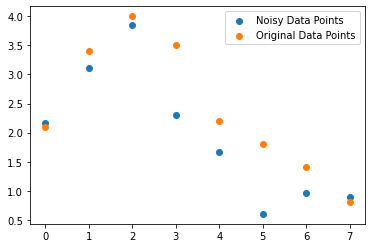

In [9]:
noise = np.random.normal(0, 0.8, len(y))
y_noisy = y + noise
plt.scatter(x, y_noisy, label='Noisy Data Points')
plt.scatter(x, y, label='Original Data Points')
plt.legend()

Least Squares

/\*/\*/\*/\*/\*/\*/\*/\*/\*/\*/\*/\*/\*/\*/\*/\*/\*/\*/\*/\*
Fitting degree  1
Fitted coefficients: [ 3.19668296 -0.35768864]
Predicted y values: [3.19668296 2.83899432 2.48130568 2.12361704 1.76592841 1.40823977
 1.05055113 0.69286249]
Error: 0.7742238174624886


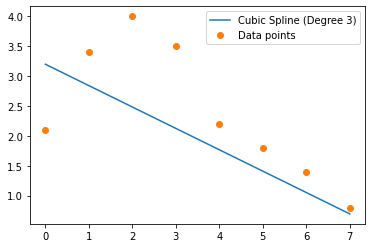

/\*/\*/\*/\*/\*/\*/\*/\*/\*/\*/\*/\*/\*/\*/\*/\*/\*/\*/\*/\*
/\*/\*/\*/\*/\*/\*/\*/\*/\*/\*/\*/\*/\*/\*/\*/\*/\*/\*/\*/\*
Fitting degree  2
Fitted coefficients: [ 2.87479994 -0.03580562 -0.04598329]
Predicted y values: [2.87479994 2.79301103 2.61925555 2.35353348 1.99584485 1.54618963
 1.00456784 0.37097948]
Error: 0.5795144376518386


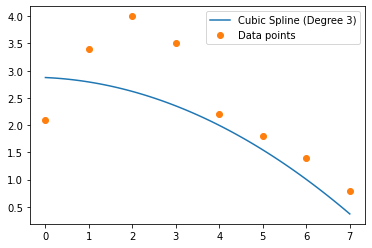

/\*/\*/\*/\*/\*/\*/\*/\*/\*/\*/\*/\*/\*/\*/\*/\*/\*/\*/\*/\*


(0.5795144376518386,
 array([2.87479994, 2.79301103, 2.61925555, 2.35353348, 1.99584485,
        1.54618963, 1.00456784, 0.37097948]))

In [10]:
polyfit(x,y_noisy,1,y)
polyfit(x,y_noisy,2,y)

Splines:

Qubic:

Error: 0.43271606859833045


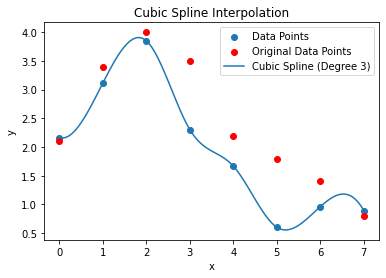

In [11]:
cs = CubicSpline(x, y_noisy)
x_points = np.linspace(min(x), max(x), 100)
y_points = cs(x_points)
print(f"Error: {np.sum((y - cs(x))**2)/len(x)}")
plt.scatter(x, y_noisy, label='Data Points')
plt.scatter(x, y, label='Original Data Points', color="red")
plt.plot(x_points, y_points, label='Cubic Spline (Degree 3)')
plt.title('Cubic Spline Interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


different splines:

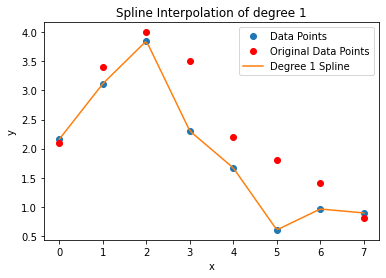

I show the error between previous splines and this one
Error: 0.4182710811282406


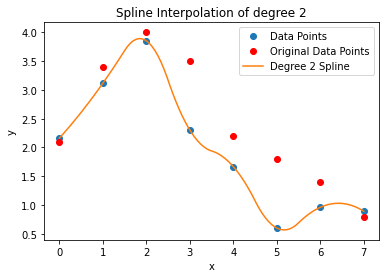

I show the error between previous splines and this one
Error: 0.4576390198430919


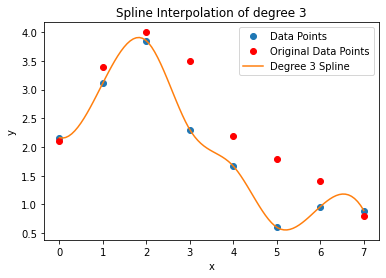

I show the error between previous splines and this one
Error: 0.4703391401734314


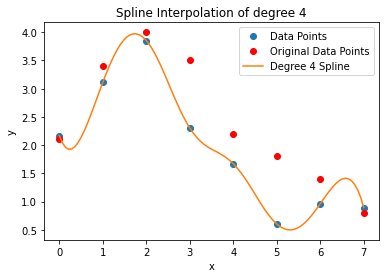

I show the error between previous splines and this one
Error: 0.5264056566845313


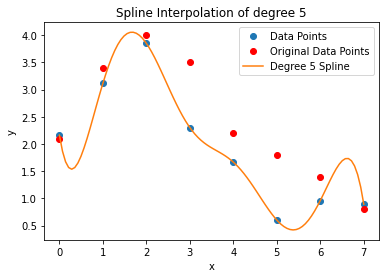

I show the error between previous splines and this one
Error: 0.6594746346328207


In [12]:
for degree in [1, 2, 3, 4, 5]:
    spline = splrep(x, y_noisy, k=degree)

    x_points = np.linspace(min(x), max(x), 100)
    y_points = splev(x_points, spline)
    pre_y = splev(x_points, splrep(x, y, k=degree))
    plt.plot(x, y_noisy, 'o', label='Data Points')
    plt.plot(x, y, 'o', label='Original Data Points', color="red")
    plt.plot(x_points, y_points, label=f'Degree {degree} Spline')
    plt.title(f'Spline Interpolation of degree {degree}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()
    # erroresh
    print("I show the error between previous splines and this one")
    print(f"Error: {np.sum((y_points-pre_y)**2)/100}")

In [13]:
# splines fits data perfectly so the error is
print(np.sum((y_noisy-y)**2)/len(y_noisy))

0.43271606859833045


Chebyshev:

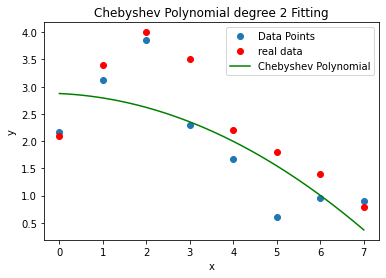

Error: 0.5795144376518391


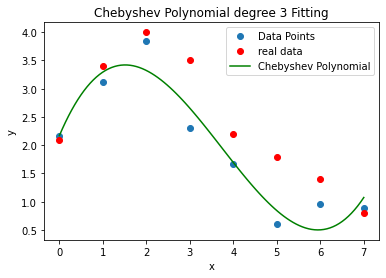

Error: 0.40530801110342846


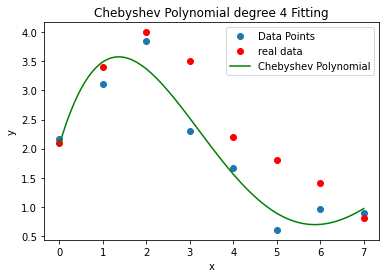

Error: 0.39188530751664896


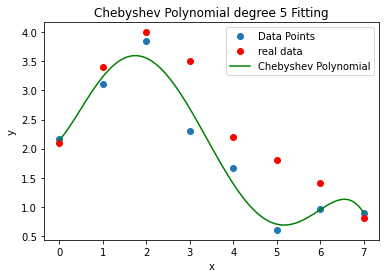

Error: 0.3699430259069108


In [14]:
for degree in [2, 3, 4, 5]:
    cheb_poly = Chebyshev.fit(x, y_noisy, degree)
    x_points = np.linspace(min(x), max(x), 100)
    y_points = cheb_poly(x_points)

    plt.plot(x, y_noisy, 'o', label='Data Points')
    plt.plot(x,y, 'o', label="real data", color="red")
    plt.plot(x_points, y_points, label=f'Chebyshev Polynomial', color="green")
    plt.title(f'Chebyshev Polynomial degree {degree} Fitting')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()
    print(f"Error: {np.sum((y - cheb_poly(x))**2)/len(x)}")

The minimum is Error: 0.3699430259069108 for chebyshev as you see above.
</br>
It seems like our real data may come from the chebyshev distribution.
</br>
Splines are not that great as they kind of fit the noise too much and give error as big as the noise.
</br>
I showed in the results that lse works not bad either. As it assumes the data is coming from the model + a gaussian noise as it really is.
</bt>
The larger error is due to the fact that our model does not seem to come from a linear or second degree model. So the structural error that
</br>
gives us the bias is making the error larger. But still it is not that bad as I said.